In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

netflix_data1 = pd.read_csv("netflix.csv")
netflix_data2 = pd.read_csv("netflix2.csv")
prime_data = pd.read_csv("prime.csv")
amazon_data = pd.read_csv("amazon.csv")

print(f"Shape of the dataset netflix_data1 -> {netflix_data1.shape}")
netflix_data1.head()

Shape of the dataset netflix_data1 -> (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
print(f"Shape of the dataset netflix_data2 -> {netflix_data2.shape}")
netflix_data2.head()

Shape of the dataset netflix_data2 -> (9957, 9)


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [7]:
print(f"Shape of the dataset prime_data -> {prime_data.shape}")
prime_data.head()

Shape of the dataset amazon1 -> (9668, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [17]:
print(f"Shape of the dataset amazon_data -> {amazon_data.shape}")
amazon_data.head()

Shape of the dataset amazon_data -> (404, 8)


,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [3]:
# Infos about popular films of netflix

In [13]:
netflix_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    404 non-null    int64  
 1   Name of the show         393 non-null    object 
 2   Year of release          393 non-null    float64
 3   No of seasons available  393 non-null    float64
 4   Language                 393 non-null    object 
 5   Genre                    393 non-null    object 
 6   IMDb rating              182 non-null    float64
 7   Age of viewers           393 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.4+ KB


In [5]:
#plt.rcParams["figure.figsize"] = (12, 7)
plt.style.use('ggplot')

In [6]:
#Infos about popular songs of 2020

In [7]:
df_2.head(10)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
1,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
2,Supalonely (feat. Gus Dapperton),BENEE,67,Hey u x,63,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488
3,Savage,Megan Thee Stallion,82,Suga,70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497
4,Moral of the Story,Ashe,68,Moral of the Story,76,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084
5,Rain On Me (with Ariana Grande),Lady Gaga,84,Rain On Me (with Ariana Grande),74,0.672,0.855,-3.764,1,9,0.0397,0.02100,0.000000,0.3230,0.646,123.056,4,182200
6,Babylon,Lady Gaga,84,Chromatica,64,0.698,0.799,-4.372,1,2,0.0342,0.01290,0.000005,0.2150,0.351,115.957,4,161733
7,Replay,Lady Gaga,84,Chromatica,66,0.658,0.878,-3.875,1,1,0.1230,0.00792,0.000000,0.9440,0.683,122.015,4,186653
8,My Oh My (feat. DaBaby),Camila Cabello,82,Romance,75,0.724,0.491,-6.024,1,8,0.0296,0.01800,0.000013,0.0887,0.383,105.046,4,170746
9,Physical,Dua Lipa,88,Future Nostalgia,75,0.647,0.844,-3.756,1,0,0.0457,0.01370,0.000658,0.1020,0.746,146.967,4,193829


In [8]:
# Duration infos about 2020 popular songs

In [9]:
average = df_2['duration_ms'].mean()
average

192805.2123287671

In [10]:
df_2_Duration_max= df_2.sort_values(by='duration_ms',ascending = False)

In [11]:
df_2_Duration_min= df_2.sort_values(by='duration_ms',ascending = True)

In [12]:
df_2.corr()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
artist_pop,1.000000,0.454283,-0.155106,0.220910,0.368931,-0.074986,-0.059061,-0.321819,-0.157549,-0.057500,0.060834,-0.043100,-0.008160,-0.012392,0.253557
track_pop,0.454283,1.000000,-0.110701,0.169852,0.271021,-0.057237,0.055323,-0.378157,-0.031077,0.041345,0.028258,0.073125,0.029875,-0.055827,0.202136
danceability,-0.155106,-0.110701,1.000000,-0.079484,-0.003816,-0.063811,-0.042784,0.228355,-0.178669,-0.077071,-0.254047,0.274157,-0.058692,0.271279,-0.195176
energy,0.220910,0.169852,-0.079484,1.000000,0.725977,0.053225,-0.024709,-0.254891,-0.427739,0.050306,0.087038,0.326783,0.042155,0.124865,0.082118
loudness,0.368931,0.271021,-0.003816,0.725977,1.000000,0.117183,-0.094636,-0.403138,-0.378126,-0.088068,0.001720,0.255612,-0.004353,0.130585,0.132917
mode,-0.074986,-0.057237,-0.063811,0.053225,0.117183,1.000000,-0.172248,-0.047611,-0.024154,0.067512,0.056187,-0.012139,0.069505,-0.053305,-0.060938
key,-0.059061,0.055323,-0.042784,-0.024709,-0.094636,-0.172248,1.000000,-0.068527,0.071869,-0.021285,0.095183,-0.010124,-0.004586,0.001936,-0.026182
speechiness,-0.321819,-0.378157,0.228355,-0.254891,-0.403138,-0.047611,-0.068527,1.000000,0.032362,-0.053059,-0.080983,-0.092050,0.199623,0.013101,-0.219046
acousticness,-0.157549,-0.031077,-0.178669,-0.427739,-0.378126,-0.024154,0.071869,0.032362,1.000000,0.066542,-0.006715,-0.130397,-0.099587,-0.251049,-0.124947
instrumentalness,-0.057500,0.041345,-0.077071,0.050306,-0.088068,0.067512,-0.021285,-0.053059,0.066542,1.000000,0.016026,-0.032078,0.082077,-0.157291,0.099834


<a id="Let us visualize"></a>
Our dataset obviously does not have many rows, but it has no missing data, at least at first glance. They may still be present in the form of a value, such as zero. 

<h1 style="text-align:center">📈Let us visualize!</h1>

We now begin with data exploration and visualization. 
To do this I am going to define a list of colors that I will use recurrently in the notebook: <u>they are the colors in the tiktok logo</u> and I have chosen them because they are relevant to the topic

<div>
<div style="float:left; width:33.3%; background-color:#09101F; height:50px"></div>
<div style="float:left; width:33.3%; background-color:#72DDF7; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#F7AEF8; height:50px"></div>
</div>

In [13]:
# Visualization of 2022 popular songs

In [14]:
# Black - Aqua Blue - Pink
colors = ["#09101F","#72DDF7", '#F7AEF8']

In almost every visualization we will make, if it has to be repeated, we will define special functions so that it can be repeated easily using the same style. 

We start with a function that customizes the axes in order to make them minimal and pleasing to the eye.

Right away, we go on to define our function to make custom histograms.

In [15]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3, color='black')

In [16]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    
    sns.histplot(data=df, x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=3
                )
    ax.lines[0].set_color(second_color)
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

Now we can finally begin to explore the dataset. 

Let us now look at the distribution of all numerical variables

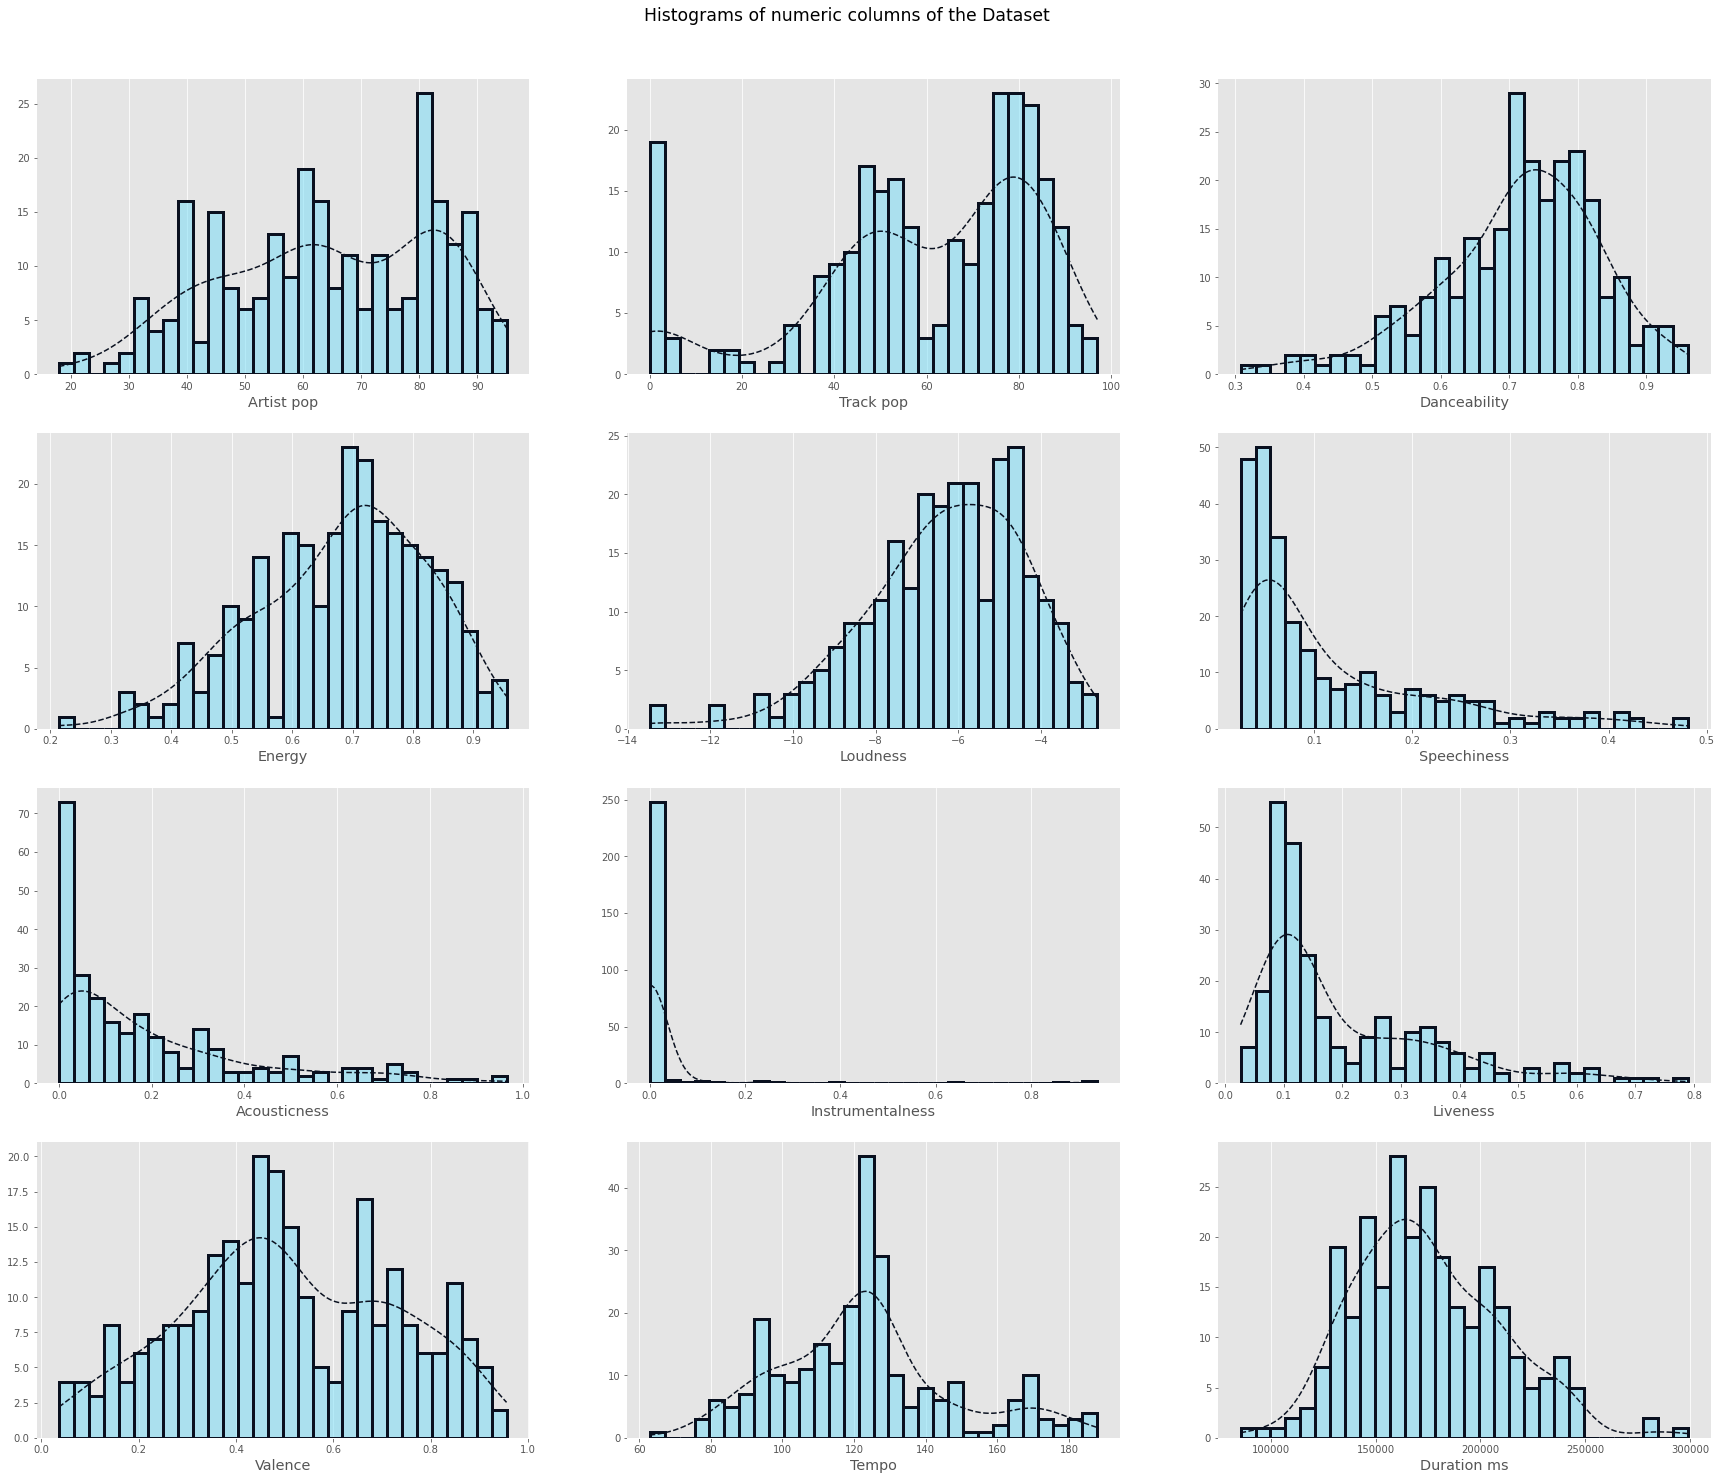

In [17]:
cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

Let us now go on to create a function to visualize the distribution of the **categorical variables** (which are also in numerical form), and plot the graph

In [18]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    
    ax.bar(df[x].value_counts().index, df[x].value_counts().values,
           color=main_color, edgecolor=second_color, linewidth=3)
    
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")
    

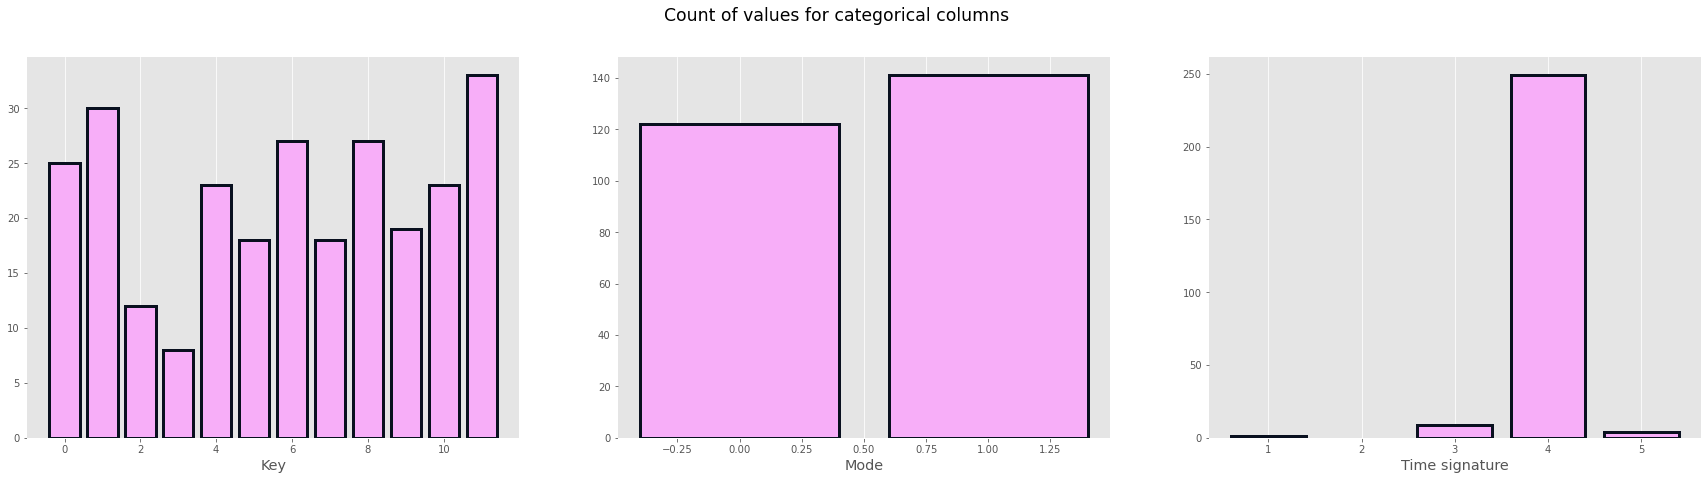

In [19]:
cols = ['key', 'mode', 'time_signature']


fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

We immediately notice that the 'key' column has a relatively even distribution, 'mode' is divided almost equally, with a slight advantage of value 1, while 'time signature' is almost entirely made up of value 4.

In [20]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean() 

We define a function to look for linear correlations between columns

In [21]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

The correlation that is likely to be strongest is with the popularity of the artist. We are therefore going to plot that graph first and later consider all the other features.

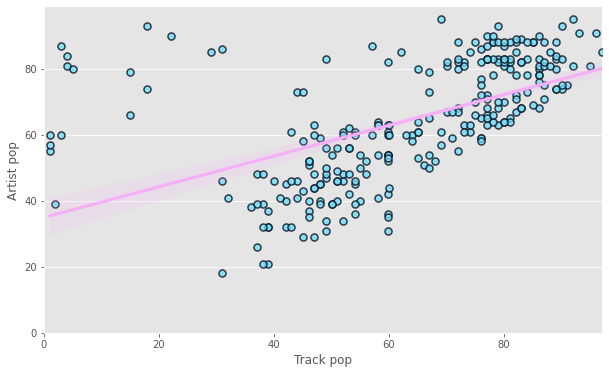

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

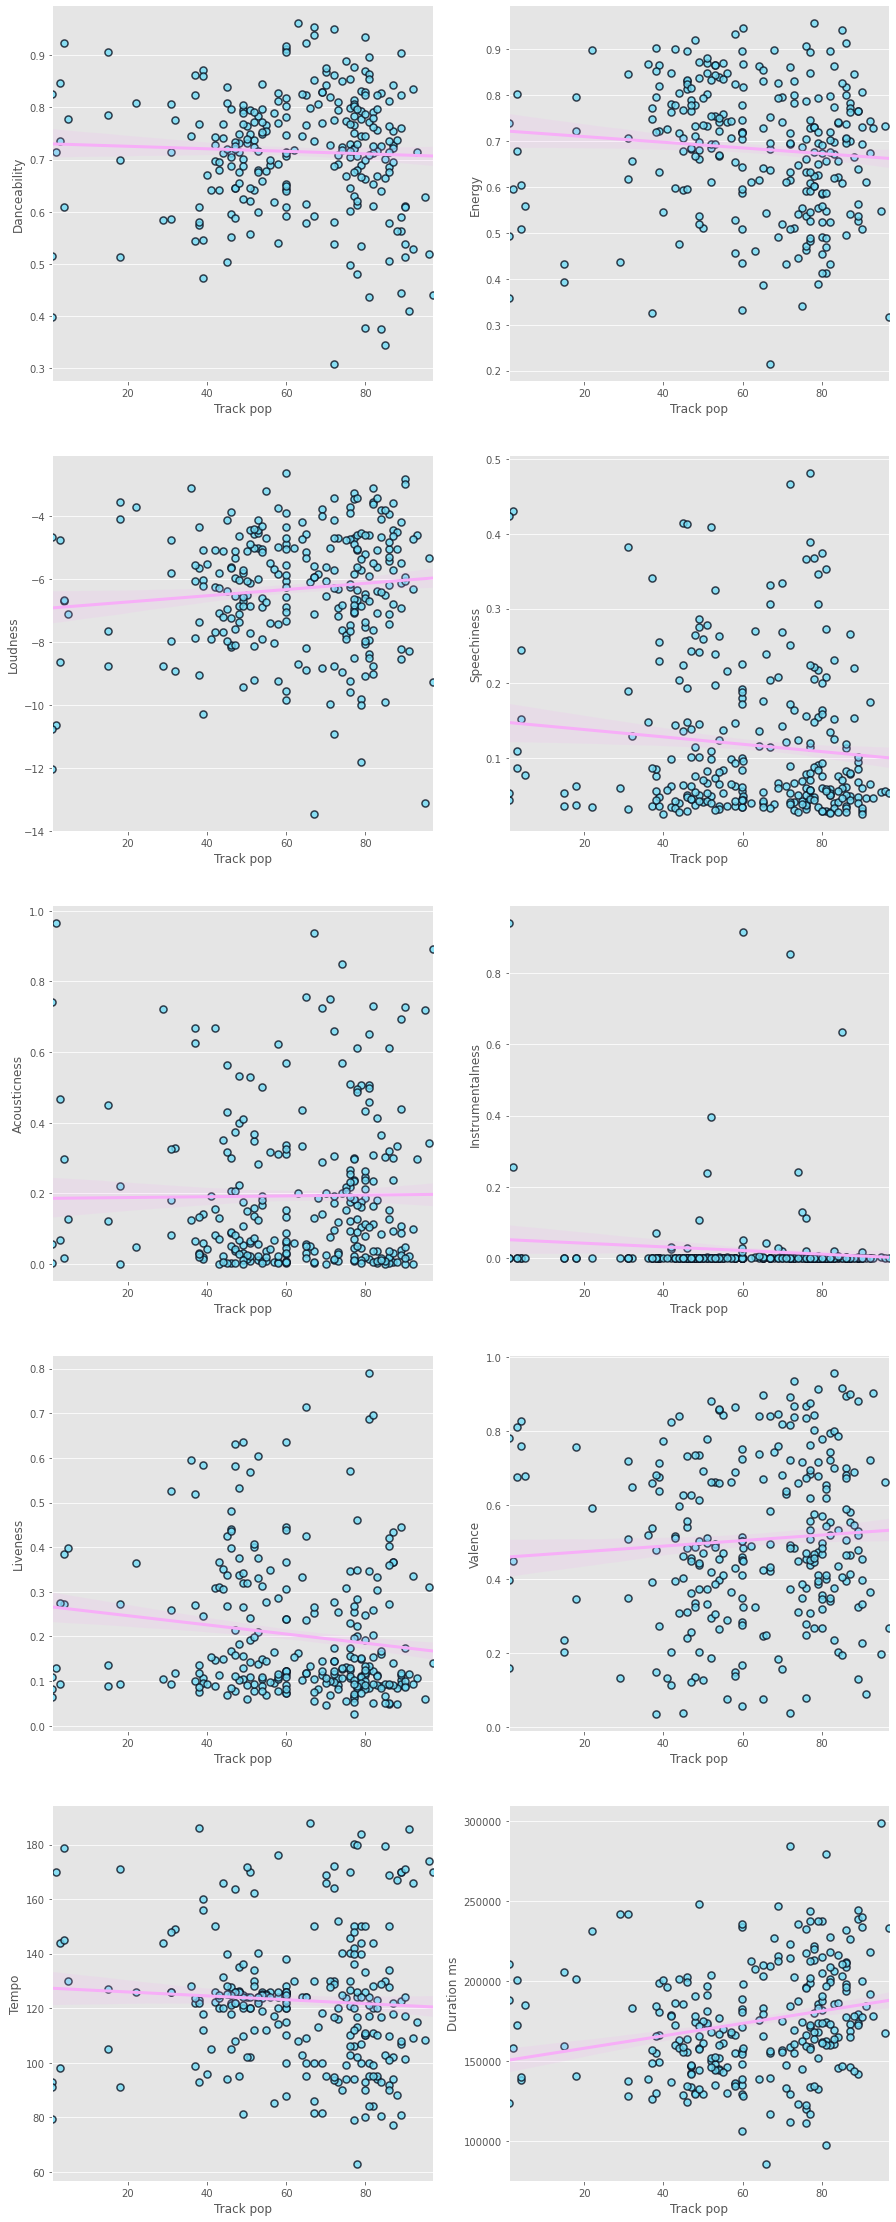

In [23]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'track_pop', col, ax)
    

plt.show()
    

As expected, the strongest linear correlation between the popularity of the song and the other features is with the popularity of the artist. 

With the rest of the columns, the correlations are weak or almost nonexistent.

Let us finally visualize the correlation between song popularity and categorical columns.

In [24]:
def stripplot(df, x, y, ax, palette=[colors[1], colors[2]]):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
                 linewidth=2, size=8)
    
    set_style(ax)

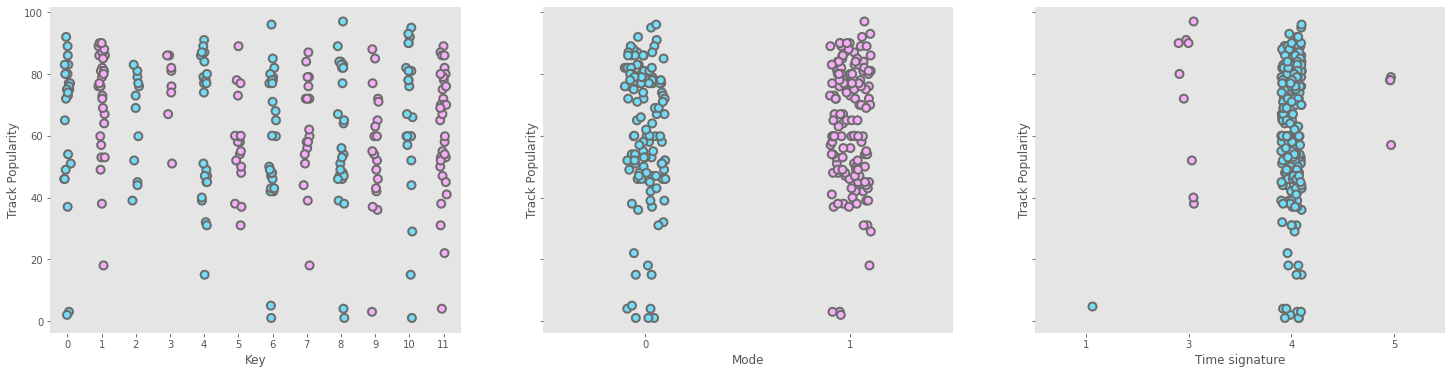

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

for i, col in enumerate(['key', 'mode', 'time_signature']):
    
    stripplot(df, col, 'track_pop', axs[i])
    
    axs[i].set(
        xlabel=col.replace("_", " ").capitalize(),
        ylabel="Track Popularity"
    )

plt.show()

There seems to be no obvious imbalance between the distribution of song popularity and the value of categorical columns.

In [26]:
def corr_map(df, ax, palette, edgecolor=colors[0]):
    
    corr = df.corr()
    
    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")
    

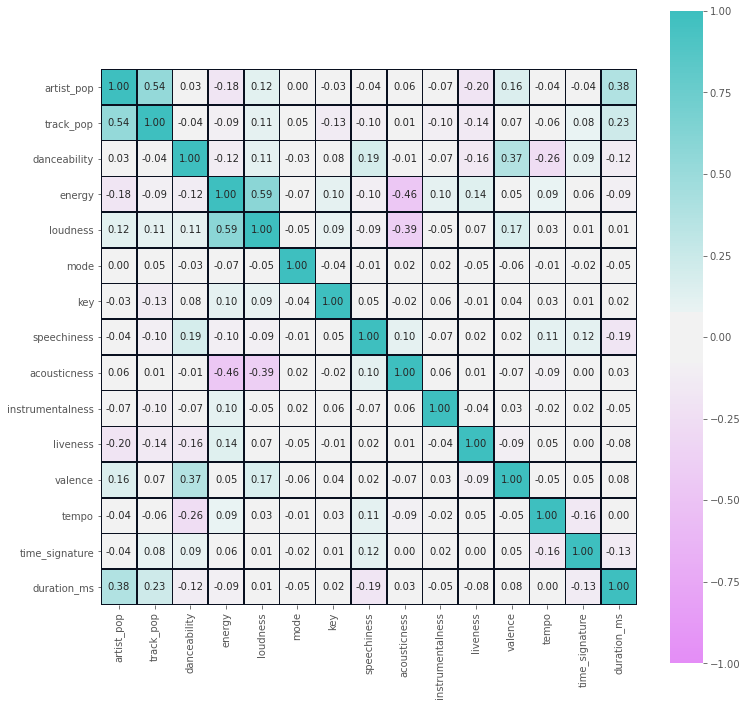

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df, ax, palette)

There are no particularly strong correlations. 

In addition to the aforementioned correlation between song popularity and artist popularity, there is a discrete linear relationship between track duration and artist popularity, and an inverse relationship between energy and acousticness

In [28]:
# 1 - Top 3 artists for popularity

artists_pop_sorted = df.loc[:, ['artist_name', 'artist_pop']].drop_duplicates('artist_name').sort_values('artist_pop', ascending=False)

artists_pop_sorted[:3]

,artist_name,artist_pop
220,Drake,95
114,The Weeknd,93
1,Harry Styles,91


**Drake** is the most popular artist according to this dataset, followed by **The Weeknd** and **Harry Styles**.

But will they be the singers with the most hits on tiktok in 2022? **Let's find out**.

In [29]:
# 2 - Top 3 artists with more hits on tiktok in 2022

artists_top_hits = df['artist_name'].value_counts(ascending=False)

artists_top_hits[:3]

Doja Cat     8
Coopex       6
Dame Dame    5
Name: artist_name, dtype: int64

Wow! None of the 3 popular artists mentioned above appear in the top 3 artists by number of hits. Leading the way is definitely **Doja Cat**, with no less than *8 tracks*! 
In second place is **Coopex**, with 6 hits, and in third place is **Dame Dame**, with 5.

In [30]:
# 3 - Top 5 track for popularity

tracks_pop_sorted = df.loc[:, ['track_name', 'track_pop']].sort_values('track_pop', ascending=False)

tracks_pop_sorted[:5]

,track_name,track_pop
5,Glimpse of Us,97.0
1,As It Was,96.0
0,Running Up That Hill (A Deal With God),95.0
52,Late Night Talking,93.0
260,Jimmy Cooks (feat. 21 Savage),92.0


The most popular song, with 97 points out of 100, is **Glimpse of Us** 🐉!

In [31]:
# Visualization of 2020 popular songs

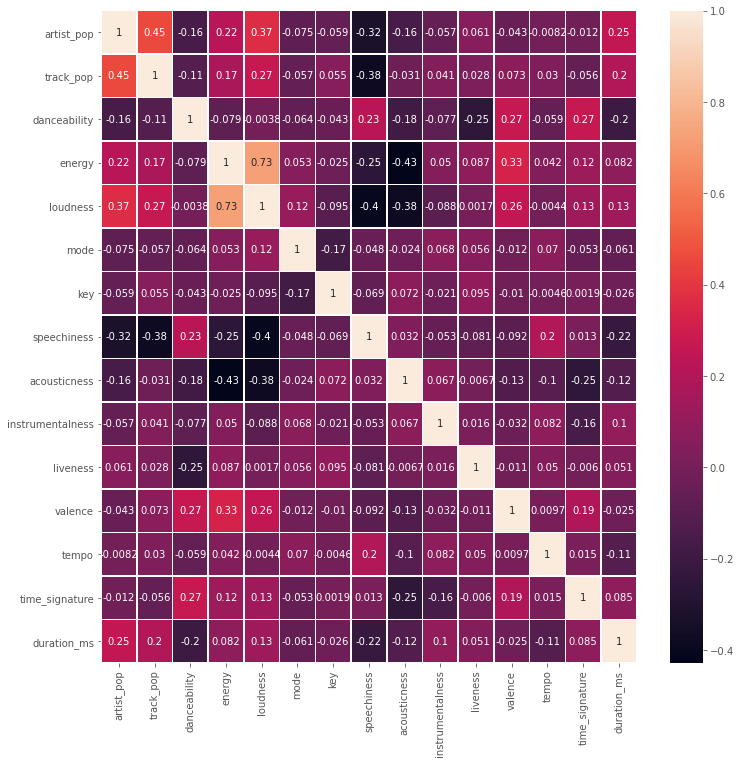

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
dataplot = sns.heatmap(df_2.corr(), annot=True, linewidths= .5)

In [33]:
# Song Duration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Let It Happen'),
  Text(1, 0, 'Moon (And It Went Like)'),
  Text(2, 0, 'Money Trees'),
  Text(3, 0, 'Heads Will Roll - A-Trak Remix'),
  Text(4, 0, 'Mi Pan Su Su Sum'),
  Text(5, 0, 'Round of Applause'),
  Text(6, 0, 'One Wish'),
  Text(7, 0, 'Ultralight Beam'),
  Text(8, 0, 'Partition'),
  Text(9, 0, 'Stronger'),
  Text(10, 0, 'Mr. Blue Sky'),
  Text(11, 0, 'No Role Modelz'),
  Text(12, 0, 'American Boy'),
  Text(13, 0, 'Freak'),
  Text(14, 0, "I'm Looking for Mrs. Bubblegum"),
  Text(15, 0, "It Won't Stop (feat. Chris Brown) - EP Version"),
  Text(16, 0, 'Moment 4 Life'),
  Text(17, 0, 'Mary Jane (All Night Long)'),
  Text(18, 0, 'Paradise'),
  Text(19, 0, 'Rake It Up (feat. Nicki Minaj)')])

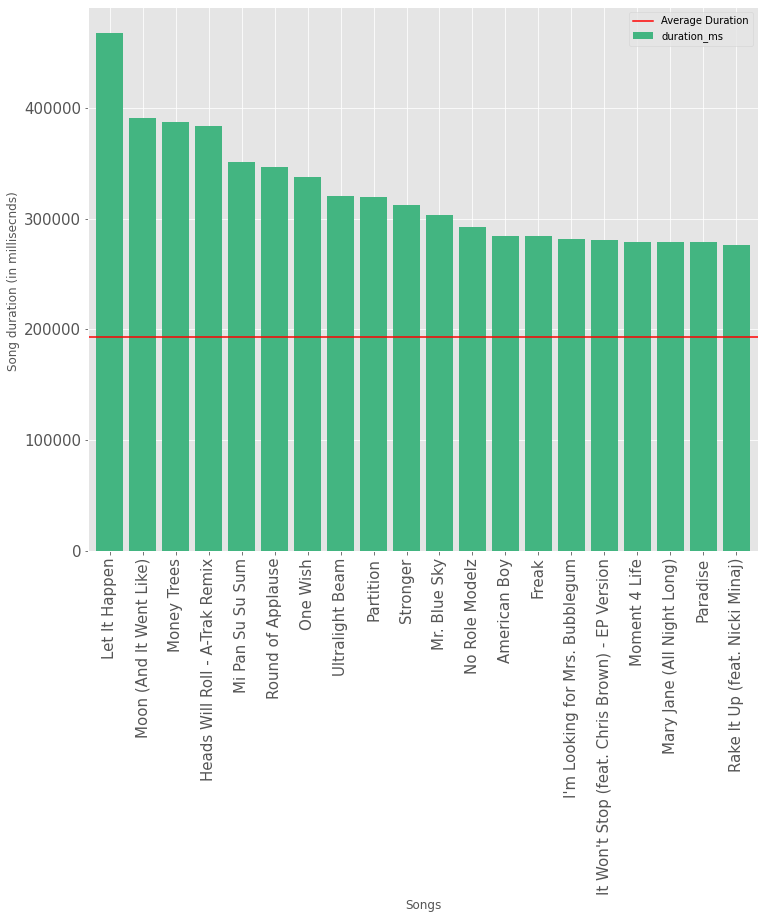

In [76]:
plt.style.use('ggplot')
df_2_Duration_max.iloc[0:20].plot('track_name','duration_ms', kind='bar', color="#43b581", width=0.8, figsize=(12, 10));
plt.axhline(y=average, color='red', label='Average Duration')
plt.xlabel('Songs')
plt.ylabel('Song duration (in millisecnds) ')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Knock at the Door'),
  Text(1, 0, 'Sofia the First Main Title Theme - From "Sofia the First"'),
  Text(2, 0, 'Hungry Hippo'),
  Text(3, 0, 'Ben 10 - Theme Song'),
  Text(4, 0, 'Marlboro Nights'),
  Text(5, 0, 'Ponteme Despalda'),
  Text(6, 0, 'I Just Want to Be the One You Love'),
  Text(7, 0, 'Vibe (If I Back It Up)'),
  Text(8, 0, 'The Dice Beat Pt. 1'),
  Text(9, 0, 'Muffins In The Freezer'),
  Text(10, 0, 'Walked In'),
  Text(11, 0, 'Crisis'),
  Text(12, 0, 'Hood Baby'),
  Text(13, 0, 'Interior Crocodile Alligator'),
  Text(14, 0, 'CITY OF ANGELS'),
  Text(15, 0, 'Crystal Dolphin'),
  Text(16, 0, 'Deep End Freestyle'),
  Text(17, 0, 'Tonight You Belong To Me'),
  Text(18, 0, "I'd Rather Sleep"),
  Text(19, 0, 'Funny Thing')])

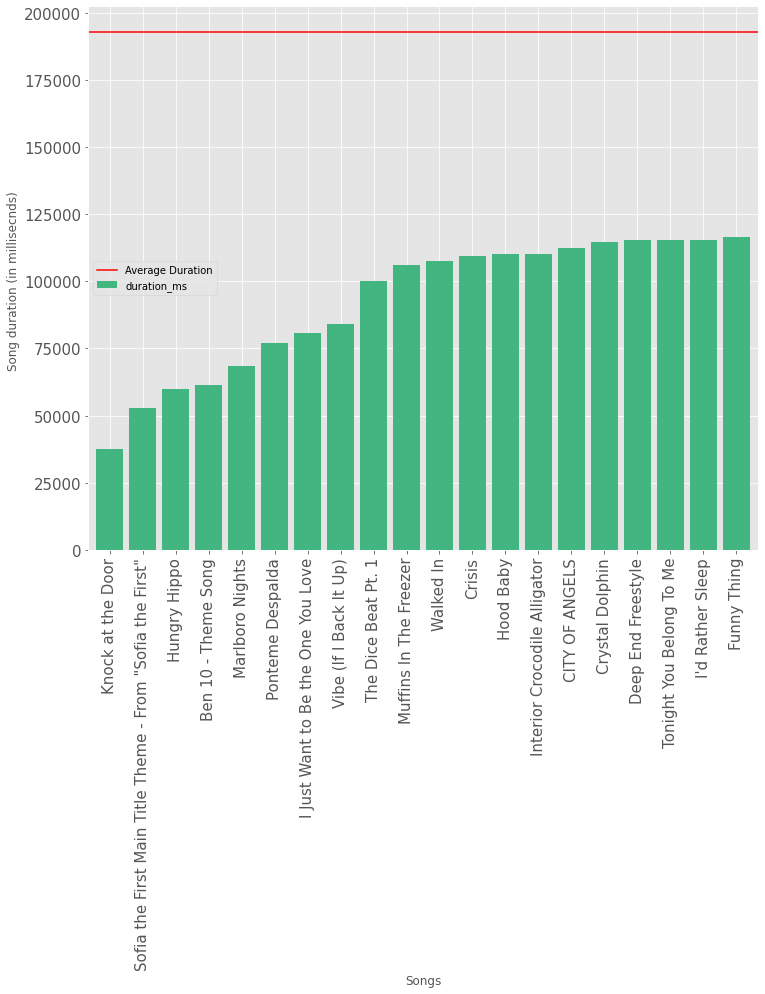

In [77]:
plt.style.use('ggplot')
df_2_Duration_min.iloc[0:20].plot('track_name','duration_ms', kind='bar', color="#43b581", width=0.8, figsize=(12, 10));
plt.axhline(y=average, color='red', label='Average Duration')
plt.xlabel('Songs')
plt.ylabel('Song duration (in millisecnds) ')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.xticks(rotation = 90)

In [36]:
# Danceability

In [37]:
df_2_dance = df_2.sort_values(by='danceability',ascending = False)

In [38]:
average_dance=df_2['danceability'].mean()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dancing in My Room'),
  Text(1, 0, "I'm Looking for Mrs. Bubblegum"),
  Text(2, 0, 'Hood Baby'),
  Text(3, 0, 'Muffins In The Freezer'),
  Text(4, 0, 'Get Up (feat. Chamillionaire)'),
  Text(5, 0, 'My Heart Went Oops'),
  Text(6, 0, 'Tap In'),
  Text(7, 0, "Go Go Go Who's Next?"),
  Text(8, 0, 'To the Right'),
  Text(9, 0, 'The Dice Beat Pt. 1')])

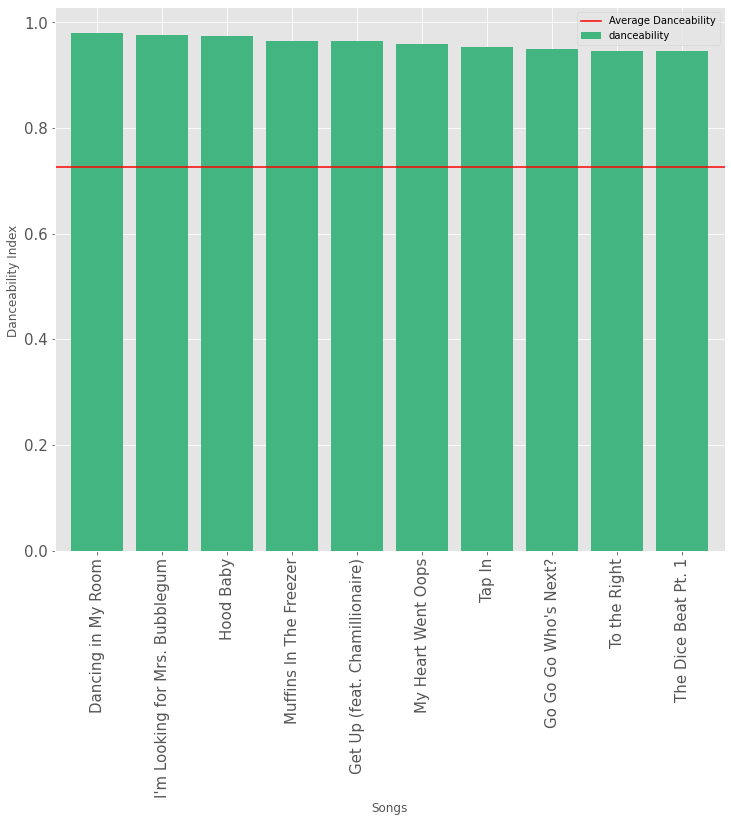

In [78]:
df_2_dance.iloc[0:10].plot('track_name','danceability', kind='bar', color=["#43b581"],width=0.8, figsize=(12, 10));
plt.axhline(y=average_dance, color='red', label='Average Danceability');
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Songs')
plt.ylabel('Danceability Index ')
plt.legend()
plt.xticks(rotation = 90)

In [40]:
# Top Artists:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Doja Cat'),
  Text(1, 0, 'Lady Gaga'),
  Text(2, 0, 'Kesha'),
  Text(3, 0, 'Kanye West'),
  Text(4, 0, 'Dua Lipa'),
  Text(5, 0, 'KYLE'),
  Text(6, 0, '24kGoldn'),
  Text(7, 0, 'Tiagz'),
  Text(8, 0, 'Tame Impala'),
  Text(9, 0, 'Taylor Swift'),
  Text(10, 0, 'Don Toliver'),
  Text(11, 0, 'Megan Thee Stallion')])

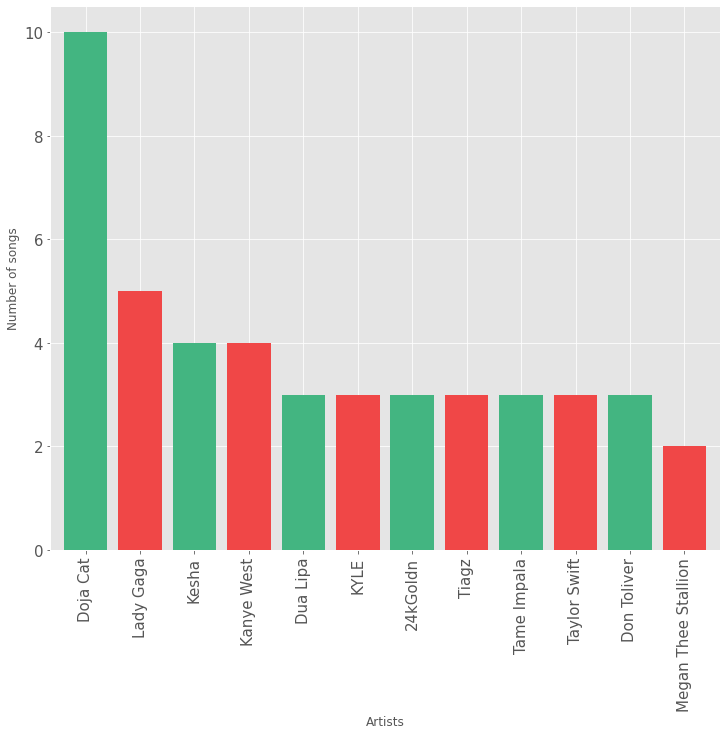

In [79]:
df_2['artist_name'].value_counts().iloc[0:12].plot(kind='bar', color=["#43b581","#f04747"], width=0.8, figsize=(12, 10))
plt.ylabel('Number of songs')
plt.xlabel('Artists')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation = 90)
#plt.legend()

In [42]:
# Music Albums:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hot Pink'),
  Text(1, 0, 'Cannibal (Expanded Edition)'),
  Text(2, 0, 'Chromatica'),
  Text(3, 0, 'Ho, why is you here ?'),
  Text(4, 0, 'After Hours'),
  Text(5, 0, 'Future Nostalgia'),
  Text(6, 0, 'The Evolution'),
  Text(7, 0, 'Heaven Or Hell'),
  Text(8, 0, 'Pray 4 Love (Deluxe)'),
  Text(9, 0, 'Please Excuse Me for Being Antisocial')])

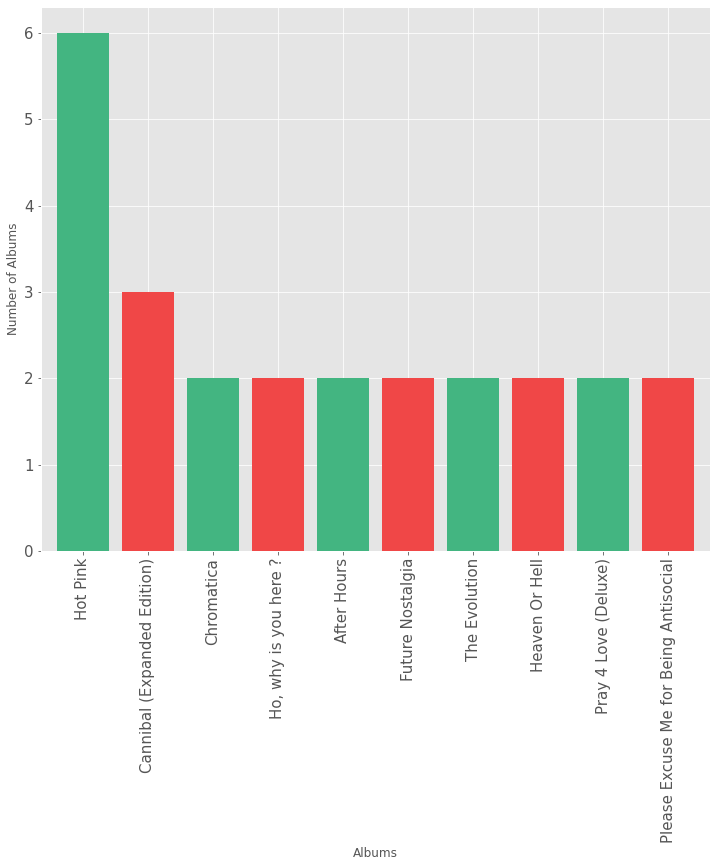

In [80]:
df_2['album'].value_counts().iloc[0:10].plot(kind='bar', color= ["#43b581","#f04747"], width=0.8, figsize=(12, 10))
plt.xlabel('Albums')
plt.ylabel('Number of Albums')
plt.xticks(rotation = 90)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [44]:
# Top 10 Most Popular Artists:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Taylor Swift'),
  Text(2, 0, 'The Weeknd'),
  Text(3, 0, 'Harry Styles'),
  Text(4, 0, 'Kanye West'),
  Text(5, 0, 'Justin Bieber'),
  Text(6, 0, 'Beyoncé'),
  Text(7, 0, 'Doja Cat'),
  Text(8, 0, 'Kendrick Lamar'),
  Text(9, 0, 'Dua Lipa')])

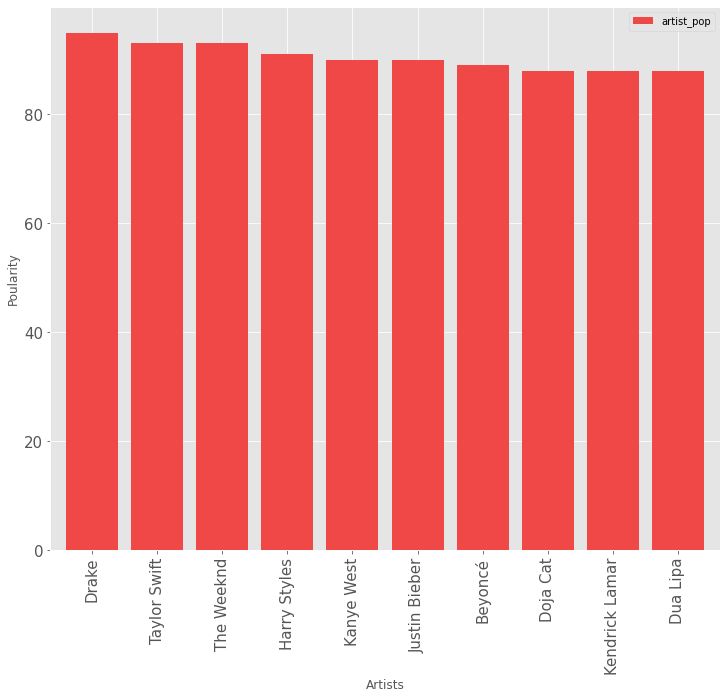

In [82]:
df_2_pop=df_2.sort_values(by='artist_pop', ascending=False).iloc[0:22]
df_2_pop.drop_duplicates(subset='artist_name').plot('artist_name','artist_pop', kind='bar',color="#f04747", width=0.8, figsize=(12, 10))
plt.xticks(rotation = 90)
plt.xlabel('Artists')
plt.ylabel('Poularity')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [46]:
# Top 10 Most Popular Tracks:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Blinding Lights'),
  Text(1, 0, 'Save Your Tears'),
  Text(2, 0, 'No Role Modelz'),
  Text(3, 0, 'Wait a Minute!'),
  Text(4, 0, 'Heather'),
  Text(5, 0, 'SLOW DANCING IN THE DARK'),
  Text(6, 0, 'The Less I Know The Better'),
  Text(7, 0, 'Lost'),
  Text(8, 0, '20 Min'),
  Text(9, 0, 'Mood (feat. iann dior)')])

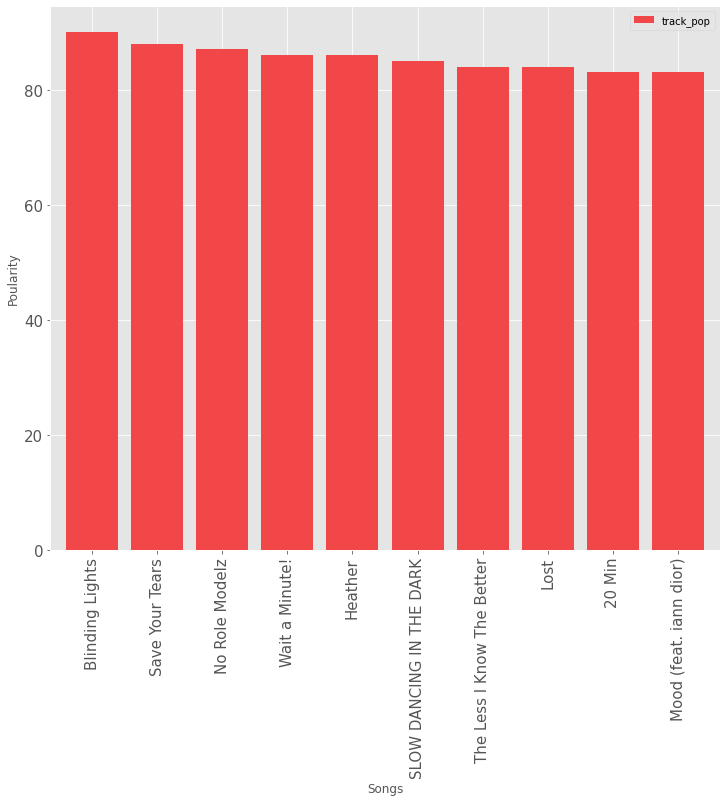

In [83]:
df_2_pop=df_2.sort_values(by='track_pop', ascending=False).iloc[0:10]
df_2_pop.drop_duplicates(subset='track_name').plot('track_name','track_pop', kind='bar',color="#f14749", width=0.8, figsize=(12, 10))
plt.xticks(rotation = 90)
plt.xlabel('Songs')
plt.ylabel('Poularity')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [48]:
# Top 1000 Tiktok Influencers Ranking

In [49]:
raw_data.head()

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971


In [50]:
## Deriving New Metrics
raw_data['views_per_subscriber'] = raw_data['Views avg.'] / raw_data['Subscribers count']
raw_data['likes_per_view'] = raw_data['Likes avg.'] / raw_data['Views avg.']
raw_data['comments_per_like'] = raw_data['Comments avg.'] / raw_data['Likes avg.']
raw_data['shares_per_like'] = raw_data['Shares avg.'] / raw_data['Likes avg.']

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

In [52]:
views_per_subcriber = raw_data.sort_values(by = 'views_per_subscriber', ascending = False).head(10)
likes_per_view = raw_data.sort_values(by = 'likes_per_view', ascending = False).head(10)
comments_per_like = raw_data.sort_values(by = 'comments_per_like', ascending = False).head(10)
shares_per_like = raw_data.sort_values(by = 'shares_per_like', ascending = False).head(10)

In [53]:
trace = go.Bar( x = views_per_subcriber.Title,
              y = views_per_subcriber.views_per_subscriber)

layout = go.Layout(title= go.layout.Title(text = "Views Per Subcriber", x = 0.5), font = dict(size = 14), width = 800, height = 500,)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [54]:
trace = go.Bar( x = likes_per_view.Title,
              y = likes_per_view.likes_per_view)

layout = go.Layout(title= go.layout.Title(text = "Likes Per View", x = 0.5), font = dict(size = 14), width = 800, height = 500,)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [55]:
trace = go.Bar( x = comments_per_like.Title,
              y = comments_per_like.comments_per_like)

layout = go.Layout(title= go.layout.Title(text = "Comments Per Like", x = 0.5), font = dict(size = 14), width = 800, height = 500,)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [56]:
trace = go.Bar( x = shares_per_like.Title,
              y = shares_per_like.shares_per_like)

layout = go.Layout(title= go.layout.Title(text = "Share Per Like", x = 0.5), font = dict(size = 14), width = 800, height = 500,)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<a id="its-time-to-predict"><a/>
<h1 style="text-align:center">🔮It's time to predict!</h1>

In [57]:
# Machine Learning Methods:

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(['track_pop', 'track_name', 'album', 'artist_name', 'instrumentalness'], axis=1).values
y = df['track_pop'].values

SEED = 15

In [59]:
bin_numbers = pd.qcut(
    x=y, q=5, labels=False, duplicates='drop'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.25, 
                                                    stratify=bin_numbers)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

ss = StandardScaler()

ss.fit(X)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

Finally, before we start the actual modeling, we create a function that allows us to evaluate the error trend on train_set and test_set depending on the value of a parameter.

In [61]:
def error_plot(x_parameter, train_rmse, test_rmse, ax, 
               xlabel=None, title=None, xscale='linear', xlim=None, 
               train_color=colors[1], test_color=colors[2], train_std=None):
    
    # I use a double plot for train and test in order to give a black border effect to the line, which is otherwise not feasible.
    ax.plot(x_parameter, train_rmse, color="black", linewidth=4,  marker="o")
    ax.plot(x_parameter, train_rmse, label='Train', color=train_color, linewidth=3,  marker="o")
    
    ax.plot(x_parameter, test_rmse, color="black", linewidth=4, marker="o")
    ax.plot(x_parameter, test_rmse, label='Test', color=test_color, linewidth=3, marker="o")
    
    if train_std:
        ax.fill_between(x_parameter, 
                        np.add(train_rmse, train_std), # train rmse + train std
                        np.add(train_rmse, -np.array(train_std)), # train rmse - train std 
                        alpha=0.05, color=train_color)

    ax.set(xlabel=xlabel, ylabel='RMSE', xscale=xscale, xlim=xlim, ylim=0, title=title)
    set_style(ax)

    ax.legend()
    

<h3 style="text-align:center">📉Model 1 - Lasso</h3>

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = np.power(10.0, np.arange(-4, 4.1, 1))
train_rmse = []
train_std = []
test_rmse = []

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha, random_state=SEED)
    
    cv = -cross_val_score(lasso, X_train, y_train, cv=4, scoring="neg_mean_absolute_error")
    
    lasso.fit(X_train, y_train)
    
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    train_rmse.append(MSE(y_train, y_train_pred)**0.5)
    train_std.append(np.std(cv))
    test_rmse.append(MSE(y_test, y_test_pred)**0.5)
    
for i, alpha in enumerate(alphas):
    print("--"*10, f" alpha={round(alpha, 4)} ", "--"*10)
    print(f"TRAIN RMSE -> {round(train_rmse[i], 2)}")
    print(f"TEST RMSE -> {round(test_rmse[i], 2)}")

--------------------  alpha=0.0001  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.37
--------------------  alpha=0.001  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.37
--------------------  alpha=0.01  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.38
--------------------  alpha=0.1  --------------------
TRAIN RMSE -> 17.19
TEST RMSE -> 17.38
--------------------  alpha=1.0  --------------------
TRAIN RMSE -> 17.66
TEST RMSE -> 16.51
--------------------  alpha=10.0  --------------------
TRAIN RMSE -> 17.92
TEST RMSE -> 16.62
--------------------  alpha=100.0  --------------------
TRAIN RMSE -> 18.91
TEST RMSE -> 17.98
--------------------  alpha=1000.0  --------------------
TRAIN RMSE -> 20.46
TEST RMSE -> 19.85
--------------------  alpha=10000.0  --------------------
TRAIN RMSE -> 20.46
TEST RMSE -> 19.81


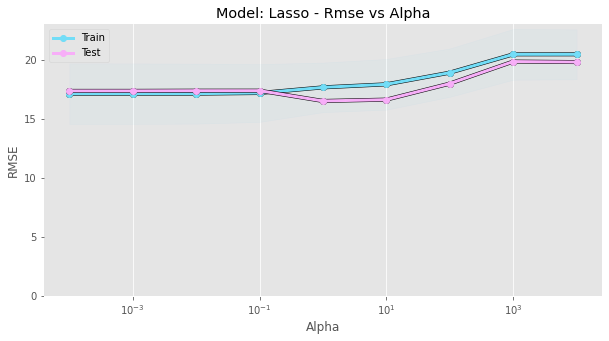

In [63]:
fig, ax = plt.subplots(figsize=(10,5))  

error_plot(alphas, train_rmse, test_rmse, ax, 
           xscale='log', xlabel='Alpha', 
           train_std=train_std, 
          title="Model: Lasso - Rmse vs Alpha")
plt.show()

The first model tested, Lasso, which depends on one main parameter, namely alpha, gave discrete results. Considering alpha=0.01, which would be my choice among all the values tried, the accuracy is not particularly good, as 17 points of error on a scale ranging from 0 to 100 is not a few. But you also have to consider the very little data available, which is about 260 rows, 25% of which are devoted to the test set. A point in favor of the model is that it generalizes very well for that alpha value, as error on the train set and test set is virtually equal, indicating that there is no overfitting.

<h3 style="text-align:center">↖️Model 2 - SVR</h3>

We now use Support Vector Regressor as the second model, and perform a search for the best hyperparameters using *GridSearchCV*

In [64]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
            'C': [0.1, 1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
            }

svr = SVR()

svr_gs = GridSearchCV(
    svr, param_grid,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

svr_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {svr_gs.best_params_ }")

print(f"Best Score -> {-round(svr_gs.best_score_,2)}")

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score -> 11.34


The results on the train set are not bad for the train set. We now transfer the search results to a DataFrame and plot the relationships between parameters.

In [65]:
svr_df = pd.DataFrame(svr_gs.cv_results_)

svr_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003740,0.000432,0.002494,4.985335e-04,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-17.832507,-15.912283,-15.165628,-19.741241,-17.162915,1.778297,35
1,0.009973,0.001727,0.000998,3.097148e-07,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",-20.973862,-13.870939,-15.336703,-25.484733,-18.916559,4.627285,42
2,0.005489,0.003199,0.001493,8.578415e-04,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",-15.872080,-13.842573,-13.414683,-18.334569,-15.365976,1.949166,15
3,0.002496,0.000502,0.001995,9.446913e-06,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-17.593834,-15.664991,-14.969581,-19.524827,-16.938308,1.776022,23
4,0.002990,0.000007,0.000997,3.908538e-07,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",-17.389812,-15.574620,-14.811171,-19.125778,-16.725345,1.672709,21


In [66]:
svr_df["mean_test_score"] = -svr_df["mean_test_score"]

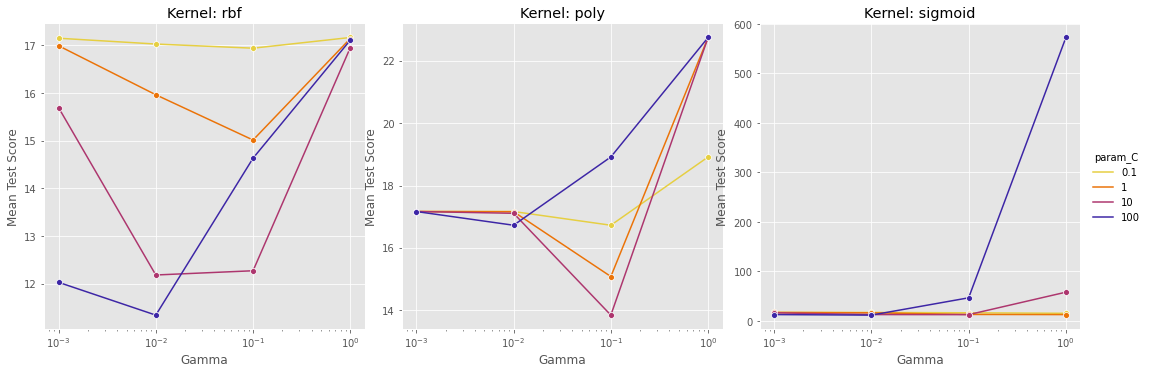

In [67]:
params_palette = sns.color_palette("CMRmap_r", n_colors=4)

g = sns.relplot(data=svr_df, x="param_gamma", y="mean_test_score", hue="param_C", col="param_kernel", 
                kind="line", facet_kws={"sharey":False},
                palette=params_palette, marker="o")

g.set(xscale="log", xlabel="Gamma", ylabel="Mean Test Score")
g.set_titles(col_template="Kernel: {col_name}", size="x-large")

plt.show()

In [68]:
best_svr_est = svr_gs.best_estimator_

best_svr_est.fit(X_train_scaled, y_train)

y_pred_train = best_svr_est.predict(X_train_scaled)
y_pred_test = best_svr_est.predict(X_test_scaled)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")

Train RMSE -> 16.699896229794167
Test RMSE -> 16.901416035596895


The best model turns out to be the one with the "rbf" kernel, gamma equal to 0.01 and C equal to 100.

The prediction results on training and testing are similar to each other, indicating the absence of overfitting, and slightly better than Lasso's model.

<h3 style="text-align:center">🌲🌲Model 3 - Gradient Boosting</h3>

As a last model, we are going to try, with RandomizedSearchCV, the GradientBoostingRegressor. 

<div style="background-color:#239AA9; color:white; text-align:center; padding:10px; font-size:1em; border-radius:1em">
In the gray of parameters I am not going to iterate max_depth, to which I will give the value 1 in a fixed way, in when with so little data GradientBoosting tends to go into strong overfitting if it has max_depth of greater value. </div>

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
params_grid = {
    "learning_rate":np.arange(0.1, 0.5, 0.05),
    "n_estimators":np.arange(40, 201, 20),
    "subsample":np.arange(0.4, 1.01, 0.1),
    "min_samples_split":np.arange(2, 10, 1),
    "min_samples_leaf":np.arange(2, 10, 1)
}
est = GradientBoostingRegressor(random_state=SEED, max_depth=1)

In [71]:
gb_rs = RandomizedSearchCV(
    estimator=est,
    param_distributions=params_grid,
    n_iter=50,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1, 
    random_state=SEED
)

In [72]:
gb_rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=1,
                                                       random_state=15),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=15, scoring='neg_mean_absolute_error',
                   verbose=1)

In [73]:
print(f"Best Parameters -> {gb_rs.best_params_ }")

print(f"Best Score -> {-round(gb_rs.best_score_,2)}")

Best Parameters -> {'subsample': 0.9999999999999999, 'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 7, 'learning_rate': 0.1}
Best Score -> 12.64


In [74]:
best_estimator = gb_rs.best_estimator_

best_estimator.fit(X_train, y_train)

y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")

Train RMSE -> 16.669759896486813
Test RMSE -> 16.533186569741332


Such a GradientBoosting model performs nearly as well as SVR. 

The results obtained in this notebook are not very accurate, but this is due to the small amount of data available. Probably with more samples, the models could achieve a lower and more satisfactory error level.